# Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Data Input
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub_example = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S


In [4]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
269,1161,3,"Pokrnic, Mr. Mate",male,17.0,0,0,315095,8.6625,NaN,S
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0000,NaN,S
330,1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S
290,1182,1,"Rheims, Mr. George Alexander Lucien",male,NaN,0,0,PC 17607,39.6000,NaN,S
253,1145,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
test.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Explorative Data Analysis

In [11]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.00,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.05,NaN,C
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.50,NaN,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.50,B69,S


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

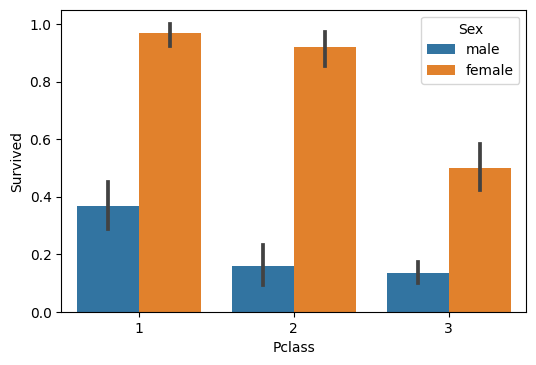

In [12]:
# Pclass - 1 = 1st, 2 = 2nd, 3 = 3rd
plt.figure(dpi=100)
sns.barplot(x='Pclass',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

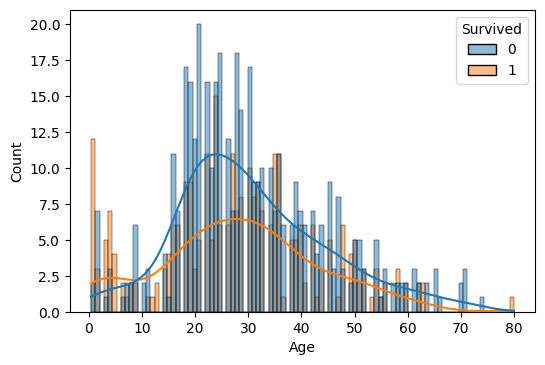

In [13]:
# Age - 0 to 76
plt.figure(dpi=100)
sns.histplot(data=train,x='Age',bins=100,kde=True,hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

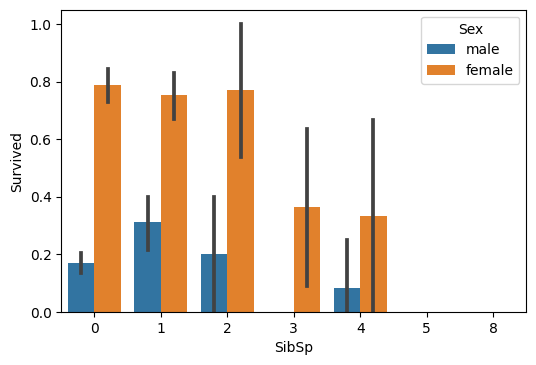

In [14]:
# SibSp - number of siblings / spouses aboard the Titanic
plt.figure(dpi=100)
sns.barplot(x='SibSp',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

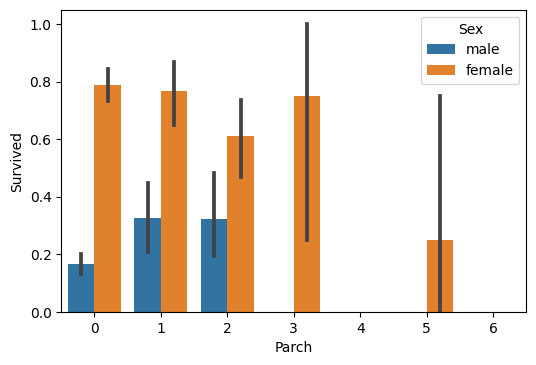

In [15]:
# Parch - number of parents / children aboard the Titanic
plt.figure(dpi=100)
sns.barplot(x='Parch',y='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

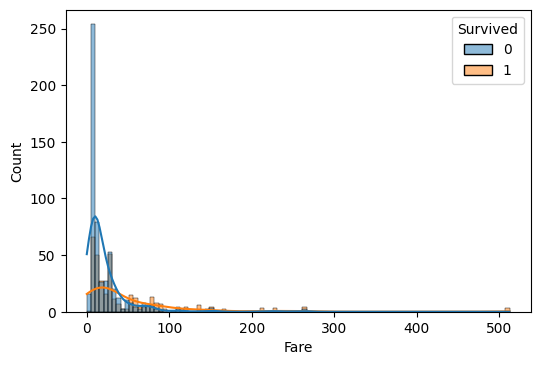

In [16]:
# Fare - 0 to 512
plt.figure(dpi=100)
sns.histplot(data=train,x='Fare',bins=100,kde=True,hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

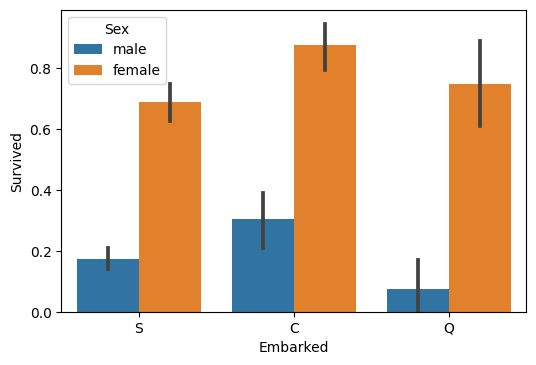

In [17]:
# Embarked - C = Cherbourg, Q = Queenstown, S = Southampton
plt.figure(dpi=100)
sns.barplot(x='Embarked',y='Survived',data=train,hue='Sex')

<AxesSubplot:>

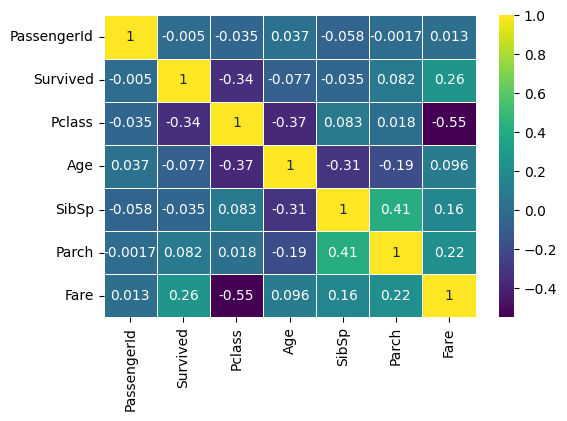

In [18]:
# Correlation between features
plt.figure(dpi=100)
sns.heatmap(train.corr(),linewidth=0.5,annot=True,cmap='viridis')

# Feature Engineering

In [19]:
# Combining Train Test Data for simplicity
train_test_data = pd.concat([train,test],axis=0)
train_test_data.head(895)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [20]:
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
# Name
train_test_data['Title'] = train_test_data['Name'].apply(lambda name: name.split(', ')[1].split('.')[0])
train_test_data['Title'] =  train_test_data['Title'].replace(\
                            to_replace=['Rev','Dr','Col','Mlle','Major','Ms','Lady','Sir','Mme','Don',\
                            'Capt','the Countess','Jonkheer','Dona'],value='Other')
train_test_data['Title'].value_counts()
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Other
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [22]:
# SibSp and Parch
train_test_data['FamilySize'] = train_test_data['SibSp'] + train_test_data['Parch'] + 1
train_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Other,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1


In [23]:
# Ticket
train_test_data['TicketType'] = train_test_data['Ticket'].str.isnumeric()
train_test_data['TicketType'] =  train_test_data['TicketType'].replace(to_replace=True,value=1)
train_test_data['TicketType'] =  train_test_data['TicketType'].replace(to_replace=False,value=0)

In [24]:
# Fare
train_test_data['Fare'].fillna(value=train_test_data['Fare'].median(),inplace=True)

In [25]:
# Embarked
train_test_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
# Drop useless columns
train_test_data.drop(['PassengerId','Survived','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [27]:
train_test_data.isnull().sum()

Pclass          0
Sex             0
Age           263
Fare            0
Embarked        2
Title           0
FamilySize      0
TicketType      0
dtype: int64

In [28]:
# Get dummies 
train_test_data_dum = pd.get_dummies(train_test_data,drop_first=True)

In [29]:
# Filling out missing age using KNN
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
train_test_data_dum_filled = imputer.fit_transform(train_test_data_dum)

In [30]:
train_test_data_dum_filled = pd.DataFrame(data=train_test_data_dum_filled,columns=train_test_data_dum.columns)

In [31]:
train_test_data_dum_filled

,Pclass,Age,Fare,FamilySize,TicketType,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3.0,22.000000,7.2500,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,38.000000,71.2833,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,26.000000,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,35.000000,53.1000,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,3.0,35.000000,8.0500,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,32.166667,8.0500,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1305,1.0,39.000000,108.9000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1306,3.0,38.500000,7.2500,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1307,3.0,29.333333,8.0500,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [32]:
X = train_test_data_dum_filled.iloc[0:891]
y = train['Survived']
X_submission = train_test_data_dum_filled.iloc[891:1309]

In [33]:
print(X.shape)
print(y.shape)
print(X_submission.shape)

(891, 12)
(891,)
(418, 12)


In [34]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Model Training

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42);

/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [36]:
# def find_best_model(X_train, X_test, y_train, y_test):
#     # Logistic Regression
#     logreg = LogisticRegression(max_iter = 600)
#     logreg.fit(X_train, y_train)
#     y_pred = logreg.predict(X_test)
#     logreg_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     # Decision Tree
#     decision_tree = DecisionTreeClassifier()
#     decision_tree.fit(X_train, y_train)
#     y_pred = decision_tree.predict(X_test)
#     decision_tree_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     # Random Forest
#     random_forest = RandomForestClassifier()
#     random_forest.fit(X_train, y_train)
#     y_pred = random_forest.predict(X_test)
#     random_forest_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     # XGBoost
#     xgb = XGBClassifier()
#     xgb.fit(X_train, y_train)
#     y_pred = xgb.predict(X_test)
#     xgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     # GBM
#     gbm = GradientBoostingClassifier()
#     gbm.fit(X_train, y_train)
#     y_pred = gbm.predict(X_test)
#     gbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     # LightGBM
#     lgbm = LGBMClassifier()
#     lgbm.fit(X_train, y_train)
#     y_pred = lgbm.predict(X_test)
#     lgbm_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        
#     # Catboost
#     catb = CatBoostClassifier(verbose = 0)
#     catb.fit(X_train, y_train)
#     y_pred = catb.predict(X_test)
#     catb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     # Histogram-based Gradient Boosting Classification Tree
#     hgb = HistGradientBoostingClassifier()
#     hgb.fit(X_train, y_train)
#     y_pred = hgb.predict(X_test)
#     hgb_acc = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    
#     model_df = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'GBM', 'LightGBM', 'Catboost', 'HistBoost'],
#                        'Score': [logreg_acc, decision_tree_acc, random_forest_acc, xgb_acc, gbm_acc, lgbm_acc, catb_acc, hgb_acc]})
#     print(model_df.sort_values('Score', ascending = False).reset_index(drop = True))

In [37]:
# find_best_model(X_train, X_test, y_train, y_test)

In [38]:
# Grid Search on Random Forest Model

# n_estimators=[100,500,1000]
# max_features= ['sqrt','log2']
# bootstrap = [True,False]
# oob_score = [True,False]
# param_grid = {'n_estimators':n_estimators,
#              'max_features':max_features,
#              'bootstrap':bootstrap,
#              'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!
# rfc = RandomForestClassifier(class_weight='balanced')
# grid = GridSearchCV(rfc,param_grid)
# grid.fit(X,y)

In [39]:
leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           n_jobs=-1,
                                           verbose=1)
leaderboard_model.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    4.6s finished


RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=1750, n_jobs=-1, oob_score=True, verbose=1)

In [40]:
predictions = leaderboard_model.predict(X_submission)
predictions

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.5s finished


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [41]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
output.to_csv('submission.csv', index=False)